In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
booking = pd.read_csv('data.csv')
df = booking[["radius_mean", "perimeter_mean", "area_mean","concavity_mean","concave points_mean","perimeter_worst","area_worst","diagnosis"]]

In [3]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,diagnosis
0,17.99,122.80,1001.0,0.30010,0.14710,184.60,2019.0,1
1,20.57,132.90,1326.0,0.08690,0.07017,158.80,1956.0,1
2,19.69,130.00,1203.0,0.19740,0.12790,152.50,1709.0,1
3,11.42,77.58,386.1,0.24140,0.10520,98.87,567.7,1
4,20.29,135.10,1297.0,0.19800,0.10430,152.20,1575.0,1
...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,166.10,2027.0,1
565,20.13,131.20,1261.0,0.14400,0.09791,155.00,1731.0,1
566,16.60,108.30,858.1,0.09251,0.05302,126.70,1124.0,1
567,20.60,140.10,1265.0,0.35140,0.15200,184.60,1821.0,1


In [4]:
#Dataset info
df.shape

(569, 8)

In [5]:
df.describe()


,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.088799,0.048919,107.261213,880.583128,0.372583
std,3.524049,24.298981,351.914129,0.079720,0.038803,33.602542,569.356993,0.483918
min,6.981000,43.790000,143.500000,0.000000,0.000000,50.410000,185.200000,0.000000
25%,11.700000,75.170000,420.300000,0.029560,0.020310,84.110000,515.300000,0.000000
50%,13.370000,86.240000,551.100000,0.061540,0.033500,97.660000,686.500000,0.000000
75%,15.780000,104.100000,782.700000,0.130700,0.074000,125.400000,1084.000000,1.000000
max,28.110000,188.500000,2501.000000,0.426800,0.201200,251.200000,4254.000000,1.000000


In [6]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['is_inlier_IF'] = iso_forest.fit_predict(df)

In [7]:
inliers_IF = df[df['is_inlier_IF'] == 1]
outliers_IF = df[df['is_inlier_IF'] == -1]

In [8]:
outliers_IF

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,diagnosis,is_inlier_IF
0,17.990,122.80,1001.0,0.30010,0.147100,184.60,2019.0,1,-1
1,20.570,132.90,1326.0,0.08690,0.070170,158.80,1956.0,1,-1
3,11.420,77.58,386.1,0.24140,0.105200,98.87,567.7,1,-1
9,12.460,83.97,475.9,0.22730,0.085430,97.65,711.4,1,-1
18,19.810,130.00,1260.0,0.14790,0.094980,186.80,2398.0,1,-1
23,21.160,137.20,1404.0,0.10970,0.086320,188.00,2615.0,1,-1
24,16.650,110.00,904.6,0.15250,0.091700,177.00,2215.0,1,-1
41,10.950,71.90,371.1,0.10440,0.056690,87.22,514.0,1,-1
46,8.196,51.71,201.9,0.01588,0.005917,57.26,242.2,0,-1
68,9.029,58.79,250.5,0.31300,0.043750,65.50,324.7,0,-1


In [9]:
inliers_IF

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,diagnosis,is_inlier_IF
2,19.69,130.00,1203.0,0.19740,0.12790,152.50,1709.0,1,1
4,20.29,135.10,1297.0,0.19800,0.10430,152.20,1575.0,1,1
5,12.45,82.57,477.1,0.15780,0.08089,103.40,741.6,1,1
6,18.25,119.60,1040.0,0.11270,0.07400,153.20,1606.0,1,1
7,13.71,90.20,577.9,0.09366,0.05985,110.60,897.0,1,1
...,...,...,...,...,...,...,...,...,...
560,14.05,91.38,600.4,0.04462,0.04304,100.20,706.7,0,1
561,11.20,70.67,386.0,0.00000,0.00000,75.19,439.6,0,1
562,15.22,103.40,716.9,0.25500,0.09429,128.70,915.0,1,1
565,20.13,131.20,1261.0,0.14400,0.09791,155.00,1731.0,1,1


In [10]:
def is_inlier(row):
    # Radius Mean constraint: If Malignant, radius_mean should be > 10
    if row['diagnosis'] == 'M' and row['radius_mean'] < 10:
        #print(f"Invalid radius mean: {row['radius_mean']}")
        return -1

    # Radius Mean constraint: If Benign, radius_mean should be > 6
    if row['diagnosis'] == 'B' and row['radius_mean'] < 6:
        return -1
        
    # Perimeter Mean constraint: If Malignant, perimeter_mean should be > 70
    if row['diagnosis'] == 'M' and row['perimeter_mean'] < 70:
        return -1

    # Perimeter Mean constraint: If Benign, perimeter_mean should be > 41
    if row['diagnosis'] == 'B' and row['perimeter_mean'] < 41:
        return -1
        
    # Area Mean constraint: If Malignant, area_mean should be >= 350
    if row['diagnosis'] == 'M' and row['area_mean'] < 350:
        return -1

    # Area Mean constraint: If Benign, area_mean should be >= 142
    if row['diagnosis'] == 'B' and row['area_mean'] < 142:
        return -1

    # Concavity Mean constraint: concavity_mean < 0.5
    if row['concavity_mean'] > 0.5:
        return -1

    # Concave Points Mean constraint: concave_points_mean > 0
    if row['concave points_mean'] < 0:
        return -1

    # Worst Perimeter constraint: If Malignant, perimeter_worst > 84
    if row['diagnosis'] == 'M' and row['perimeter_worst'] < 84:
        return -1

    # Worst Perimeter constraint: If Benign, perimeter_worst > 49
    if row['diagnosis'] == 'B' and row['perimeter_worst'] < 49:
        return -1
    
    # Worst Area constraint: If Malignant, area_worst > 500
    if row['diagnosis'] == 'M' and row['area_worst'] < 500:
        return -1

    # Worst Area constraint: If Benign, area_worst > 184
    if row['diagnosis'] == 'B' and row['area_worst'] < 184:
        return -1

    # If all constraints are satisfied, return 1
    return 1

In [11]:
#Extracting and analysing through human-written constraints
df['is_inlier_HW'] = df.apply(is_inlier, axis=1)

In [12]:
inliers_HW = df[df['is_inlier_HW'] == 1]
outliers_HW = df[df['is_inlier_HW'] == -1]
outliers_HW

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,diagnosis,is_inlier_IF,is_inlier_HW


In [13]:
#disagreements between two methods
df['similar'] = abs(df['is_inlier_IF'] + df['is_inlier_HW']) / 2

In [14]:
mismatch = df[df['similar'] == 0]
similar = df[df['similar'] == 1]

In [15]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [16]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df['is_inlier_HW'], df['is_inlier_IF'])
conf_matrix

array([[  0,   0],
       [ 57, 512]])

Text(95.72222222222221, 0.5, 'Handwritten')

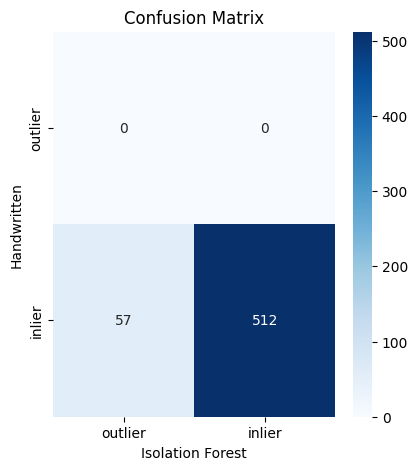

In [17]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [18]:
#Both agree it is inlier
all_inlier = df[(df['is_inlier_IF'] == 1) & (df['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [19]:
#Both agree it is outlier
all_outlier = df[(df['is_inlier_IF'] == -1) & (df['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")